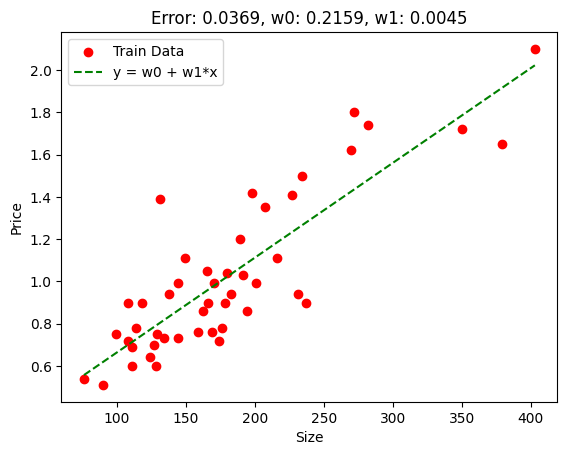

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("HousePriceVsSizeLinearRegression.txt")

# Straight Line Function
def y(x_given,w0,w1):
    return w0 + w1*x_given

# MSE (Mean Square Error) Function
def mse(x,t,w0,w1):
     return np.mean((t-y(x,w0,w1))**2)

# Coefficients, Error, and Data Splitting Function
def linReg1D(data, train_len = len(data)):
    x_train = data['Size'][0:train_len].values
    t_train = data['Price'][0:train_len].values

    x_test = None
    t_test = None
    if train_len < len(data):
        x_test = data['Size'][train_len:len(data)].values
        t_test = data['Price'][train_len:len(data)].values

    x_train_avg = np.mean(x_train)
    t_train_avg = np.mean(t_train)

    w1 = np.sum((x_train - x_train_avg) * (t_train - t_train_avg)) / np.sum((x_train - x_train_avg)**2)
    w0 = t_train_avg - w1*x_train_avg

    train_err = mse(x_train,t_train,w0,w1)
    test_err = None
    if train_len < len(data):
        test_err = mse(x_test,t_test,w0,w1)

    if train_len < len(data):
        return [w0,w1,train_err,test_err,x_train,t_train,x_test,t_test]
    else:
        return [w0,w1,train_err,x_train,t_train]

# Full Training

w0,w1,err,x_train,t_train = linReg1D(data)

# Plotting the Results
plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.title(f"Error: {err:.4f}, w0: {w0:.4f}, w1: {w1:.4f}")
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot([np.min(x_train),np.max(x_train)],[y(np.min(x_train),w0,w1), y(np.max(x_train),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

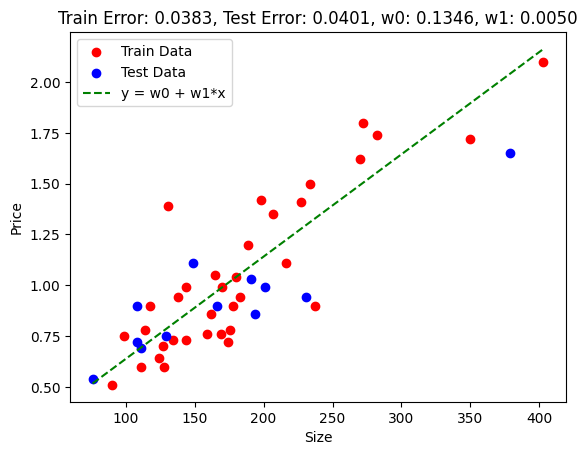

In [23]:
# 35 Values Training

w0,w1,trainErr,testErr,x_train,t_train,x_test,t_test = linReg1D(data,35)

# Plotting the Results
plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.scatter(x_test,t_test, marker='o', color='blue', label="Test Data")
plt.title(f"Train Error: {trainErr:.4f}, Test Error: {testErr:.4f}, w0: {w0:.4f}, w1: {w1:.4f}")
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot([np.min(x_test),np.max(x_train)],[y(np.min(x_test),w0,w1), y(np.max(x_train),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

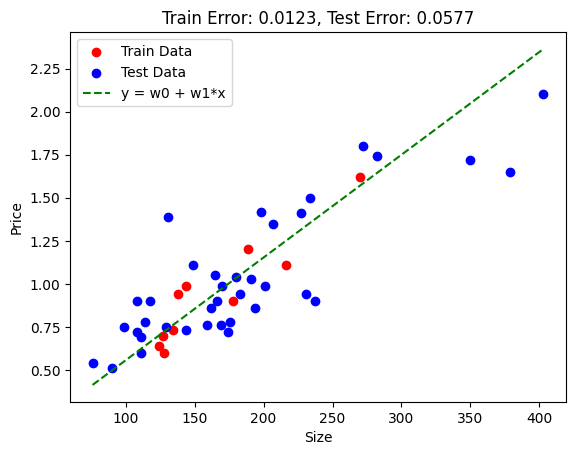

In [24]:
# 10 Values Training

w0,w1,trainErr,testErr,x_train,t_train,x_test,t_test = linReg1D(data,10)

# Plotting the Results
plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.scatter(x_test,t_test, marker='o', color='blue', label="Test Data")
plt.title(f"Train Error: {trainErr:.4f}, Test Error: {testErr:.4f}")
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot([np.min(x_test),np.max(x_test)],[y(np.min(x_test),w0,w1), y(np.max(x_test),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

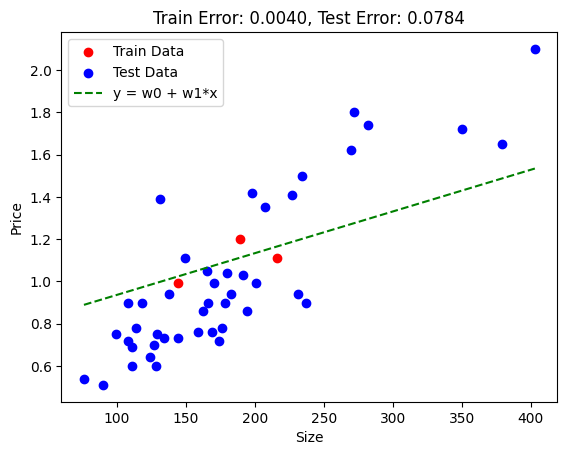

In [25]:
# 3 Values Training

w0,w1,trainErr,testErr,x_train,t_train,x_test,t_test = linReg1D(data,3)

# Plotting the Results
plt.scatter(x_train,t_train, marker='o', color='red', label="Train Data")
plt.scatter(x_test,t_test, marker='o', color='blue', label="Test Data")
plt.title(f"Train Error: {trainErr:.4f}, Test Error: {testErr:.4f}")
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot([np.min(x_test),np.max(x_test)],[y(np.min(x_test),w0,w1), y(np.max(x_test),w0,w1)], color='green', linestyle='--', label="y = w0 + w1*x")
plt.legend()
plt.show()

In [26]:
# Matrix Calculations

# Building the Train Data Matrix
x = np.ones((len(data['Size']), 2))
x[:,1] = data['Size'].values

# Converting the Test Data to a Numpy Matrix
t = np.matrix(data['Price'].values).T

# Calculating the Coefficients
w = np.linalg.inv(x.T @ x) @ x.T @ t
print(f'Matrix Calculated w0: {w[0]}')
print(f'Matrix Calculated w1: {w[1]}')

# Calculating the MSE (Mean Square Error)
err = ((t - x @ w).T/len(t)) @ (t - x @ w)
print(f'Matrix Calculated Error: {err}')

Matrix Calculated w0: [[0.21594976]]
Matrix Calculated w1: [[0.00448264]]
Matrix Calculated Error: [[0.03691604]]
